<a href="https://colab.research.google.com/github/pradeepprasad/Machine_Learning_Workspace/blob/master/Keras_Neural_Network_0_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0-preview is required
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
  print ("tensorflow Version is ", tf.__version__)
except Exception:
  pass

import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

tensorflow Version is  2.0.0-rc1


In [14]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int)
#y = (iris.target).astype(np.int)
per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

#print("Printing values contained in iris dataset - \n", iris)
#print("Printing values contained in X variable - \n", X)
#print("Printing values contained in y variable - \n", y)
print("Printing predicted values of input fed - \n", y_pred)

Printing predicted values of input fed - 
 [1]


Saving figure perceptron_iris_plot


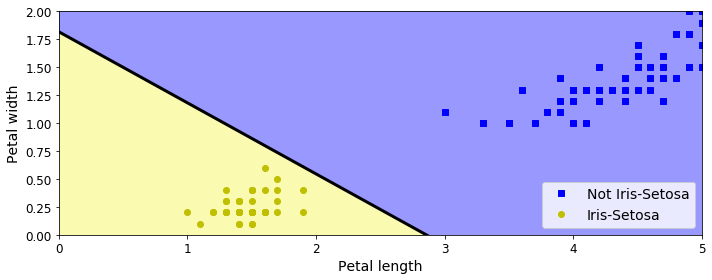

In [15]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

save_fig("perceptron_iris_plot")
plt.show()

In [0]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

Saving figure activation_functions_plot


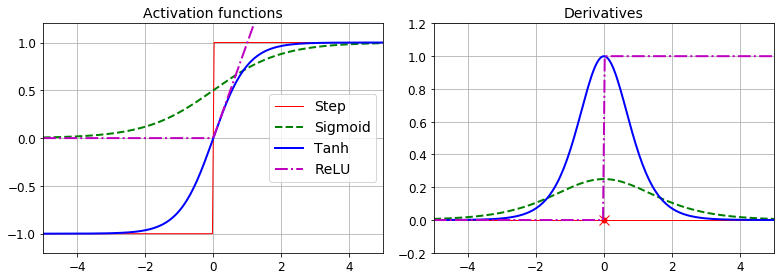

In [17]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()

In [0]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

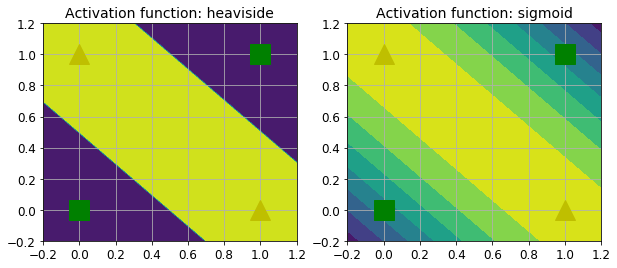

In [19]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

In [22]:
import tensorflow as tf
from tensorflow import keras
print("TF version is /n", tf.__version__)
print("Keras version is /n", keras.__version__)


TF version is /n 2.0.0-rc1
Keras version is /n 2.2.4-tf


In [23]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [27]:
display(X_train_full.shape)
display(X_train_full.dtype)

(60000, 28, 28)

dtype('uint8')

In [0]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

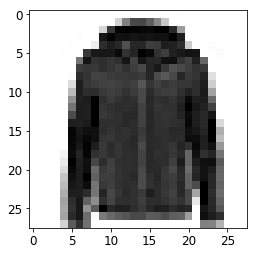

In [38]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('on')
plt.show()

In [0]:
#lets see what happens when we don't divide pixels by 255
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test

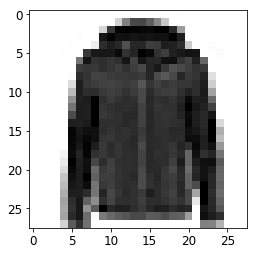

In [46]:
#plt.imshow(X_train[0], cmap= "viridis")
plt.imshow(X_train[0], cmap="binary")
#plt.imshow(X_train[0], cmap= "cividis")
plt.axis('on')
plt.show()

In [47]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [0]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [49]:
class_names[y_train[0]]

'Coat'

In [50]:
X_valid.shape

(5000, 28, 28)

Saving figure fashion_mnist_plot


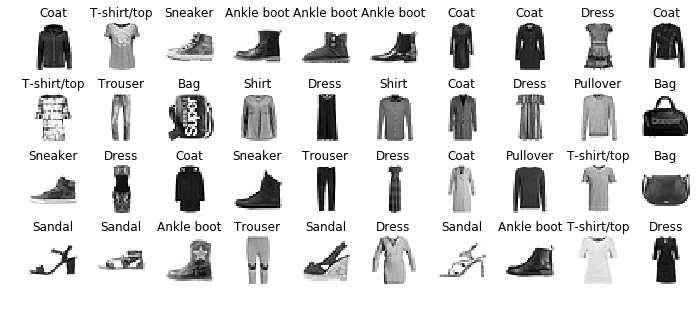

In [51]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

In [0]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))    # flatten bits for 28 * 28 pixels
model.add(keras.layers.Dense(300, activation="relu"))    # 300 connected perceptron for 1st hidden layer with activation as relu for ignoring <=0 values
model.add(keras.layers.Dense(100, activation="relu"))    # 100 connected perceptron for 2nd hidden layer with activation as relu for ignoring <=0 values
model.add(keras.layers.Dense(10 , activation="softmax")) # 10 output values based on softmax activation, which means output should go to one have max probability.

In [0]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [0]:
#Below definition is same as NN defined above except 

model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[28, 28]),    # flatten bits for 28 * 28 pixels
  keras.layers.Dense(300, activation="relu"),    # 300 connected perceptron for 1st hidden layer with activation as relu for ignoring <=0 values
  keras.layers.Dense(100, activation="relu"),    # 100 connected perceptron for 2nd hidden layer with activation as relu for ignoring <=0 values
  keras.layers.Dense(10, activation="softmax")   # 10 output values based on softmax activation, which means output should go to one have max probability.
])

In [55]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


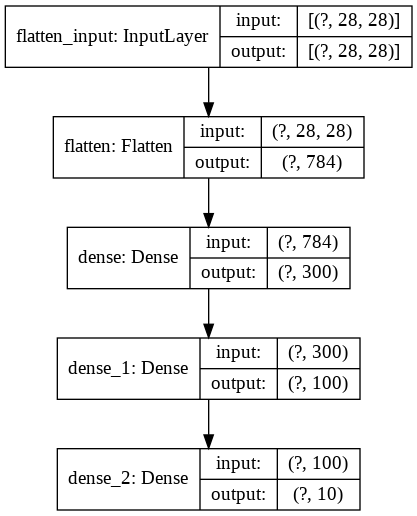

In [56]:
keras.utils.plot_model(model, "my_mnist_model.png", show_shapes=True)

In [58]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [59]:
model.get_layer(hidden1.name) is hidden1

True

In [60]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [61]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [62]:
weights.shape

(784, 300)

In [63]:
biases.shape

(300,)

In [0]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"]
              )

In [65]:
history = model.fit(X_train, y_train, epochs=30, 
                    validation_data=(X_valid, y_valid)
                    )

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 6s 106us/sample - loss: 245242066.7502 - accuracy: 0.0981 - val_loss: 2.3085 - val_accuracy: 0.0914
Epoch 2/30
55000/55000 [==============================] - 4s 80us/sample - loss: 2.3027 - accuracy: 0.0987 - val_loss: 2.3086 - val_accuracy: 0.0914
Epoch 3/30
55000/55000 [==============================] - 4s 79us/sample - loss: 2.3027 - accuracy: 0.0996 - val_loss: 2.3085 - val_accuracy: 0.1008
Epoch 4/30
55000/55000 [==============================] - 4s 80us/sample - loss: 2.3027 - accuracy: 0.0992 - val_loss: 2.3088 - val_accuracy: 0.0914
Epoch 5/30
55000/55000 [==============================] - 4s 79us/sample - loss: 2.3027 - accuracy: 0.0978 - val_loss: 2.3085 - val_accuracy: 0.0914
Epoch 6/30
55000/55000 [==============================] - 4s 80us/sample - loss: 2.3027 - accuracy: 0.0997 - val_loss: 2.3085 - val_accuracy: 0.0980
Epoch 7/30
55000/55000 [========================

In [66]:
history.params

{'batch_size': 32,
 'do_validation': True,
 'epochs': 30,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy'],
 'samples': 55000,
 'steps': 1719,
 'verbose': 0}

In [67]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [68]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Saving figure keras_learning_curves_plot


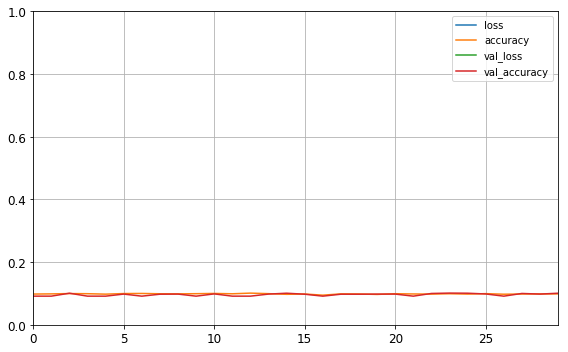

In [69]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")
plt.show()

In [70]:
model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[2.302597037887573, 0.1]

In [71]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]], dtype=float32)

In [72]:
y_pred = model.predict_classes(X_new)
y_pred

array([2, 2, 2])

In [73]:
np.array(class_names)[y_pred]

array(['Pullover', 'Pullover', 'Pullover'], dtype='<U11')

In [74]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

Saving figure fashion_mnist_images_plot


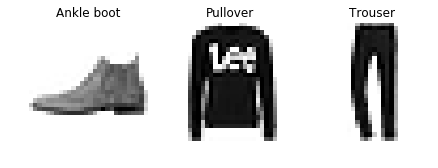

In [75]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()

In [76]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [0]:
np.random.seed(42)
tf.random.set_seed(42)

In [78]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 113us/sample - loss: 1.6321 - val_loss: 1.5903
Epoch 2/20
11610/11610 [==============================] - 1s 83us/sample - loss: 0.7124 - val_loss: 0.6539
Epoch 3/20
11610/11610 [==============================] - 1s 86us/sample - loss: 0.6348 - val_loss: 0.6039
Epoch 4/20
11610/11610 [==============================] - 1s 85us/sample - loss: 0.5983 - val_loss: 0.5738
Epoch 5/20
11610/11610 [==============================] - 1s 85us/sample - loss: 0.5713 - val_loss: 0.5406
Epoch 6/20
11610/11610 [==============================] - 1s 85us/sample - loss: 0.5482 - val_loss: 0.5221
Epoch 7/20
11610/11610 [==============================] - 1s 84us/sample - loss: 0.5298 - val_loss: 0.4965
Epoch 8/20
11610/11610 [==============================] - 1s 83us/sample - loss: 0.5138 - val_loss: 0.4843
Epoch 9/20
11610/11610 [==============================] - 1s 85us/sample - loss: 0.5005 - val_

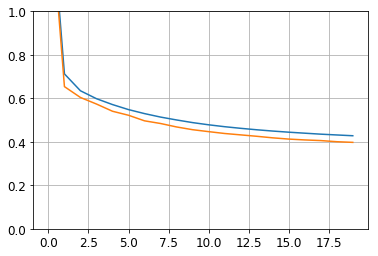

In [79]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [80]:
y_pred

array([[0.36892918],
       [1.681905  ],
       [3.0886497 ]], dtype=float32)

In [0]:
np.random.seed(42)
tf.random.set_seed(42)

In [0]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [83]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 30)           930         dense_5[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_6[0][0]                

In [84]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 117us/sample - loss: 1.2474 - val_loss: 0.8727
Epoch 2/20
11610/11610 [==============================] - 1s 91us/sample - loss: 0.6341 - val_loss: 0.8881
Epoch 3/20
11610/11610 [==============================] - 1s 91us/sample - loss: 0.5885 - val_loss: 0.5573
Epoch 4/20
11610/11610 [==============================] - 1s 92us/sample - loss: 0.5599 - val_loss: 0.5238
Epoch 5/20
11610/11610 [==============================] - 1s 91us/sample - loss: 0.5367 - val_loss: 0.6201
Epoch 6/20
11610/11610 [==============================] - 1s 89us/sample - loss: 0.5170 - val_loss: 0.4979
Epoch 7/20
11610/11610 [==============================] - 1s 90us/sample - loss: 0.5022 - val_loss: 0.5240
Epoch 8/20
11610/11610 [==============================] - 1s 90us/sample - loss: 0.4885 - val_loss: 0.4538
Epoch 9/20
11610/11610 [==============================] - 1s 91us/sample - loss: 0.4778 - val_

In [0]:
np.random.seed(42)
tf.random.set_seed(42)

In [0]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [87]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
deep_input (InputLayer)         [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, 30)           210         deep_input[0][0]                 
__________________________________________________________________________________________________
wide_input (InputLayer)         [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 30)           930         dense_8[0][0]                    
____________________________________________________________________________________________

In [88]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 121us/sample - loss: 1.8095 - val_loss: 1.4409
Epoch 2/20
11610/11610 [==============================] - 1s 95us/sample - loss: 0.6798 - val_loss: 0.6123
Epoch 3/20
11610/11610 [==============================] - 1s 95us/sample - loss: 0.5957 - val_loss: 0.5618
Epoch 4/20
11610/11610 [==============================] - 1s 93us/sample - loss: 0.5580 - val_loss: 0.5514
Epoch 5/20
11610/11610 [==============================] - 1s 95us/sample - loss: 0.5331 - val_loss: 0.5073
Epoch 6/20
11610/11610 [==============================] - 1s 93us/sample - loss: 0.5124 - val_loss: 0.4860
Epoch 7/20
11610/11610 [==============================] - 1s 95us/sample - loss: 0.4972 - val_loss: 0.4631
Epoch 8/20
11610/11610 [==============================] - 1s 92us/sample - loss: 0.4834 - val_loss: 0.4514
Epoch 9/20
11610/11610 [==============================] - 1s 95us/sample - loss: 0.4746 - val_

In [0]:
np.random.seed(42)
tf.random.set_seed(42)

In [0]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [0]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))

In [92]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 2s 161us/sample - loss: 2.1329 - main_output_loss: 1.9166 - aux_output_loss: 4.0719 - val_loss: 2.2885 - val_main_output_loss: 1.5657 - val_aux_output_loss: 8.7861
Epoch 2/20
11610/11610 [==============================] - 1s 117us/sample - loss: 0.8910 - main_output_loss: 0.6989 - aux_output_loss: 2.6202 - val_loss: 1.4258 - val_main_output_loss: 0.6285 - val_aux_output_loss: 8.5972
Epoch 3/20
11610/11610 [==============================] - 1s 121us/sample - loss: 0.7397 - main_output_loss: 0.6064 - aux_output_loss: 1.9374 - val_loss: 1.3894 - val_main_output_loss: 0.5941 - val_aux_output_loss: 8.5417
Epoch 4/20
11610/11610 [==============================] - 1s 121us/sample - loss: 0.6746 - main_output_loss: 0.5684 - aux_output_loss: 1.6301 - val_loss: 1.3275 - val_main_output_loss: 0.6028 - val_aux_output_loss: 7.8451
Epoch 5/20
11610/11610 [==============================] - 1s 12

In [93]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [0]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [95]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 2s 173us/sample - loss: 2.2968 - output_1_loss: 2.1826 - output_2_loss: 3.3166 - val_loss: 3.0093 - val_output_1_loss: 1.5519 - val_output_2_loss: 16.1139
Epoch 2/10
11610/11610 [==============================] - 1s 118us/sample - loss: 0.9760 - output_1_loss: 0.8529 - output_2_loss: 2.0834 - val_loss: 1.9291 - val_output_1_loss: 0.7524 - val_output_2_loss: 12.5119
Epoch 3/10
11610/11610 [==============================] - 1s 119us/sample - loss: 0.8288 - output_1_loss: 0.7270 - output_2_loss: 1.7431 - val_loss: 1.6768 - val_output_1_loss: 0.7256 - val_output_2_loss: 10.2305
Epoch 4/10
11610/11610 [==============================] - 1s 116us/sample - loss: 0.7637 - output_1_loss: 0.6744 - output_2_loss: 1.5665 - val_loss: 1.4544 - val_output_1_loss: 0.6860 - val_output_2_loss: 8.3638
Epoch 5/10
11610/11610 [==============================] - 1s 120us/sample - loss: 0.7227 - output_1_

In [0]:
model = WideAndDeepModel(30, activation="relu")

In [0]:
np.random.seed(42)
tf.random.set_seed(42)

In [0]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [99]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 1s 111us/sample - loss: 1.8631 - val_loss: 3.2403
Epoch 2/10
11610/11610 [==============================] - 1s 87us/sample - loss: 0.6723 - val_loss: 0.6939
Epoch 3/10
11610/11610 [==============================] - 1s 86us/sample - loss: 0.5927 - val_loss: 0.5531
Epoch 4/10
11610/11610 [==============================] - 1s 87us/sample - loss: 0.5550 - val_loss: 0.5519
Epoch 5/10
11610/11610 [==============================] - 1s 88us/sample - loss: 0.5278 - val_loss: 0.5715
Epoch 6/10
11610/11610 [==============================] - 1s 87us/sample - loss: 0.5032 - val_loss: 0.5591
Epoch 7/10
11610/11610 [==============================] - 1s 86us/sample - loss: 0.4863 - val_loss: 0.4593
Epoch 8/10
11610/11610 [==============================] - 1s 86us/sample - loss: 0.4701 - val_loss: 0.4651
Epoch 9/10
11610/11610 [==============================] - 1s 84us/sample - loss: 0.4586 - val_

In [0]:
model.save("my_keras_model.h5")

In [0]:
model = keras.models.load_model("my_keras_model.h5")

In [102]:
model.predict(X_new)

array([[0.54909724],
       [1.658485  ],
       [3.0271606 ]], dtype=float32)

In [0]:
model.save_weights("my_keras_weights.ckpt")

In [104]:
model.load_weights("my_keras_weights.ckpt")